## importing datacleaning Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import LabelEncoder


## Imporitng data 


In [28]:

def read_data(link):
    Data=pd.read_csv(link,index_col=0)
    Data.drop_duplicates(inplace=True)
    return Data
Data=read_data("/home/learner/Desktop/ImmoLiza_reg/Regression_Hussain/Data/Maxim_Cleaned_data.csv")

In [29]:
Data

,id,Locality,Type of property,Subtype of property,Type of sale,Fully equipped kitchen,Fireplace,Terrace,Garden,Garden area,...,Surface area of the plot of land,Swimming pool,State of the building,Compound Listing,Price,Number of rooms,Living Area,Furnished,Terrace area,Number of facades
0,20320744,1150,APARTMENT,APARTMENT,residential_sale,1,0,1,1,290.0,...,0.0,0,GOOD,single,575000.0,3.0,160.0,0.0,40.000000,3.0
1,20317718,9000,APARTMENT,APARTMENT,residential_sale,1,0,1,0,0.0,...,0.0,0,AS_NEW,compound,390000.0,3.0,96.0,0.0,29.000000,2.0
2,20315842,9051,APARTMENT,APARTMENT,residential_sale,1,0,1,0,0.0,...,0.0,0,GOOD,compound,260000.0,1.0,76.0,0.0,12.000000,3.0
3,20315799,9051,APARTMENT,APARTMENT,residential_sale,1,0,1,0,0.0,...,0.0,0,GOOD,compound,325000.0,1.0,81.0,0.0,13.000000,3.0
4,20315776,9051,APARTMENT,APARTMENT,residential_sale,1,0,1,0,0.0,...,0.0,0,GOOD,compound,365000.0,3.0,101.0,0.0,13.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,20218101,9900,HOUSE,HOUSE,residential_sale,1,0,1,0,0.0,...,110.0,0,TO_RENOVATE,single,179000.0,2.0,170.0,0.0,27.560968,3.0
10993,20159909,9860,HOUSE,HOUSE,residential_sale,0,0,1,0,0.0,...,340.0,0,TO_BE_DONE_UP,single,249000.0,3.0,141.0,0.0,5.430545,3.0
10994,20162961,3530,HOUSE,HOUSE,residential_sale,0,0,0,0,0.0,...,2108.0,0,TO_RENOVATE,single,299000.0,3.0,190.0,0.0,0.000000,3.0
10995,11376970,9310,HOUSE,MIXED_USE_BUILDING,residential_sale,0,0,1,1,295.0,...,565.0,0,TO_BE_DONE_UP,single,395000.0,7.0,431.0,0.0,25.000000,2.0


In [30]:
print(Data.columns)

Index(['id', 'Locality', 'Type of property', 'Subtype of property',
       'Type of sale', 'Fully equipped kitchen', 'Fireplace', 'Terrace',
       'Garden', 'Garden area', 'Surface of the land',
       'Surface area of the plot of land', 'Swimming pool',
       'State of the building', 'Compound Listing', 'Price', 'Number of rooms',
       'Living Area', 'Furnished', 'Terrace area', 'Number of facades'],
      dtype='object')


In [31]:
Data["Compound Listing"].unique()

array(['single', 'compound'], dtype=object)

#### Nothing empty 

In [27]:
Data.isnull().sum()


id                                  0
Locality                            0
Fully equipped kitchen              0
Fireplace                           0
Terrace                             0
Garden                              0
Garden area                         0
Surface of the land                 0
Surface area of the plot of land    0
Swimming pool                       0
Price                               0
Number of rooms                     0
Living Area                         0
Furnished                           0
Terrace area                        0
Number of facades                   0
Type_encoded                        0
SubType_encoded                     0
State of the building_encoded       0
Compound Listing_encoded            0
dtype: int64

In [5]:
def Data_exploration(Data):
    numerical_data =Data.select_dtypes(include=[float, int])
    # Calculate the correlation matrix
    correlation_matrix = numerical_data.corr()
    print(correlation_matrix.Price)
    sns.heatmap(correlation_matrix[['Price']], annot=True, cmap='coolwarm', fmt='.2f')
    plt.show()

  
    return




id                                  0.020499
Locality                           -0.116673
Fully equipped kitchen              0.016093
Fireplace                           0.124175
Terrace                             0.109150
Garden                              0.101009
Garden area                         0.161547
Surface of the land                 0.161547
Surface area of the plot of land    0.277513
Swimming pool                       0.150840
Price                               1.000000
Number of rooms                     0.464521
Living Area                         0.466505
Furnished                           0.015584
Terrace area                        0.149775
Number of facades                   0.160536
Name: Price, dtype: float64


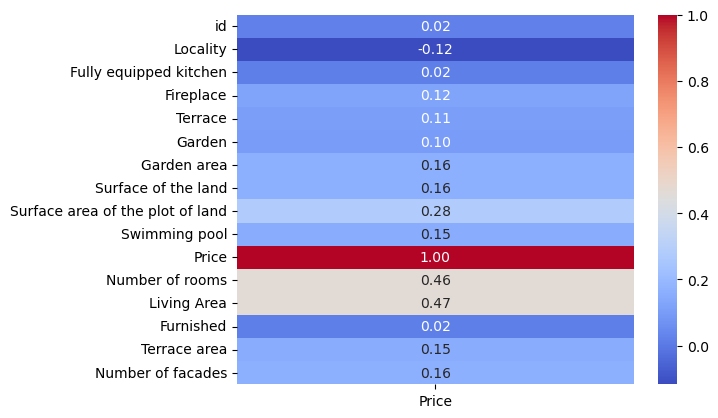

In [6]:
Data_exploration(Data)

## Qualitative (Categorical) Variables:
These variables represent categories or groups:
- Locality (object)
- Type (object)
- SubType (object)
- Sale_Type (object)
- State (object)
- Munplicity (object)
- Region (object)

## Quantitative (Numeric) Variables:

#### These variables represent measurable quantities:
- Price (int64)
- Bedrooms (int64)
- Living_Area (int64)
- Terrace_Area (int64)
- Garden_Area (int64)
- Land_Surface (int64)
- Surface of the plot (int64)
- Facades (int64)
- X(float64)
- Y (float64)

### Boolean Variables:
These are variables that can take two possible values (True or False), and they are stored as integers (0 or 1):

- Is_Equiped_Kitchen (int64)
- Is_Furnished (int64)
- Is_Open_Fire (int64)
- Terrace (int64)
- Garden (int64)
- Swim_pool (int64)

### enCoding

In [23]:
non_numerical_df = Data.select_dtypes(include=['object'])
non_numerical_df.columns

Index(['Type of property', 'Subtype of property', 'Type of sale',
       'State of the building', 'Compound Listing'],
      dtype='object')

In [32]:
def encoding (Data):

    df1=Data
    # Initialize the label encoder(each locality to integer)
    label_encoder = LabelEncoder()

   
 





    # Binary encoding for Type
    df1['Type_encoded'] = df1['Type of property'].map({'APARTMENT': 0, 'HOUSE': 1})

    # Label encoding 'SubType' using pandas' factorize method
    df1['SubType_encoded'] = pd.factorize(df1['Subtype of property'])[0]

    
    # 
    # Label encoding 'State of the building' using pandas' factorize method
    df1['State of the building_encoded'] = pd.factorize(df1['State of the building'])[0]
    # Label encoding 'State of the building' using pandas' factorize method
    df1['Compound Listing_encoded'] = pd.factorize(df1['Compound Listing'])[0]


    df1.drop(['Type of property', 'Subtype of property', 'Type of sale',
       'State of the building', 'Compound Listing'], axis=1, inplace=True)
    return df1



In [33]:
Encoded_Data= encoding(Data)
Encoded_Data

,id,Locality,Fully equipped kitchen,Fireplace,Terrace,Garden,Garden area,Surface of the land,Surface area of the plot of land,Swimming pool,Price,Number of rooms,Living Area,Furnished,Terrace area,Number of facades,Type_encoded,SubType_encoded,State of the building_encoded,Compound Listing_encoded
0,20320744,1150,1,0,1,1,290.0,290.0,0.0,0,575000.0,3.0,160.0,0.0,40.000000,3.0,0,0,0,0
1,20317718,9000,1,0,1,0,0.0,0.0,0.0,0,390000.0,3.0,96.0,0.0,29.000000,2.0,0,0,1,1
2,20315842,9051,1,0,1,0,0.0,0.0,0.0,0,260000.0,1.0,76.0,0.0,12.000000,3.0,0,0,0,1
3,20315799,9051,1,0,1,0,0.0,0.0,0.0,0,325000.0,1.0,81.0,0.0,13.000000,3.0,0,0,0,1
4,20315776,9051,1,0,1,0,0.0,0.0,0.0,0,365000.0,3.0,101.0,0.0,13.000000,3.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10992,20218101,9900,1,0,1,0,0.0,0.0,110.0,0,179000.0,2.0,170.0,0.0,27.560968,3.0,1,10,4,0
10993,20159909,9860,0,0,1,0,0.0,0.0,340.0,0,249000.0,3.0,141.0,0.0,5.430545,3.0,1,10,5,0
10994,20162961,3530,0,0,0,0,0.0,0.0,2108.0,0,299000.0,3.0,190.0,0.0,0.000000,3.0,1,10,4,0
10995,11376970,9310,0,0,1,1,295.0,295.0,565.0,0,395000.0,7.0,431.0,0.0,25.000000,2.0,1,13,5,0


In [34]:
numerical_data = Encoded_Data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix.Price


id                                  0.020499
Locality                           -0.116673
Fully equipped kitchen              0.016093
Fireplace                           0.124175
Terrace                             0.109150
Garden                              0.101009
Garden area                         0.161547
Surface of the land                 0.161547
Surface area of the plot of land    0.277513
Swimming pool                       0.150840
Price                               1.000000
Number of rooms                     0.464521
Living Area                         0.466505
Furnished                           0.015584
Terrace area                        0.149775
Number of facades                   0.160536
Type_encoded                        0.206460
SubType_encoded                     0.221758
State of the building_encoded      -0.117505
Compound Listing_encoded           -0.039622
Name: Price, dtype: float64

# All Data are encoded !

Extract important features 

id                                  0.020499
Locality                           -0.116673
Fully equipped kitchen              0.016093
Fireplace                           0.124175
Terrace                             0.109150
Garden                              0.101009
Garden area                         0.161547
Surface of the land                 0.161547
Surface area of the plot of land    0.277513
Swimming pool                       0.150840
Price                               1.000000
Number of rooms                     0.464521
Living Area                         0.466505
Furnished                           0.015584
Terrace area                        0.149775
Number of facades                   0.160536
Type_encoded                        0.206460
SubType_encoded                     0.221758
State of the building_encoded      -0.117505
Compound Listing_encoded           -0.039622
Name: Price, dtype: float64


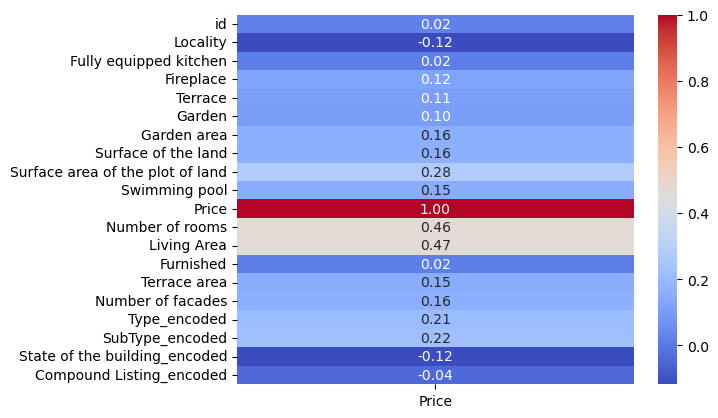

In [35]:
Data_exploration(Encoded_Data)

### Now time to normalize the values 